In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Import the backer_info.csv file into a DataFrame.
emission_data=r'C:\Users\Violet.Huang\Documents\14_Berkerly bootscamp\Module21\GCB2022v27_MtCO2_flat.csv'
df = pd.read_csv(emission_data)
#display
df.head(10)


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [4]:
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [5]:
df['Country']= df['Country'].astype('str') 
#df['ISO 3166-1 alpha-3 '] = df['ISO 3166-1 alpha-3 '].astype(str)
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [6]:
# selecting rows based on"gloable", use lot method to retrieve the data
df_global = df.loc[(df['Country']=='Global')]
df_global                            

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739280,14506.973810,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830690,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558970,14725.978030,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085730,14174.564010,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


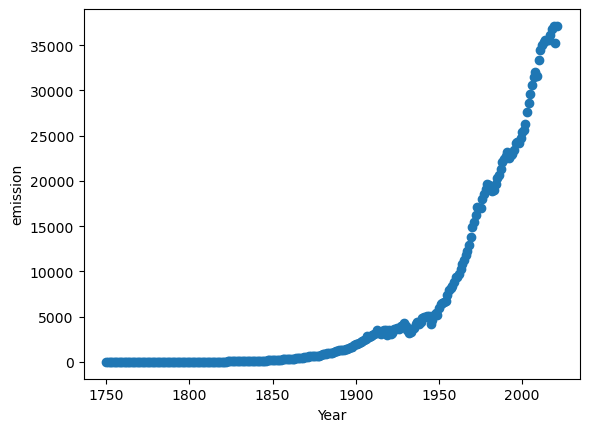

In [7]:
# trend of annual total global emissions
plt.scatter(df_global.Year,df_global.Total)
plt.xlabel('Year')
plt.ylabel('emission')
plt.show()

In [8]:
# save the global dataset
# df_global.to_csv(r'C:\Users\Violet.Huang\Documents\14_Berkerly bootscamp\Module21\global.csv')

In [9]:
# selecting the year after 1970
df_global_1970 = df.loc[(df['Country']=='Global')& (df['Year'] >= 1970)]
df_global_1970.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63052,Global,WLD,1970,14898.71540,5696.270548,6801.259524,1790.679361,288.411191,277.744916,NaN,4.031703
63053,Global,WLD,1971,15505.49581,5699.822909,7202.926175,1933.313314,303.344825,321.427172,NaN,4.112686
63054,Global,WLD,1972,16228.72920,5693.585165,7766.613848,2052.040538,321.547321,346.870011,NaN,4.220954
63055,Global,WLD,1973,17086.19245,5862.084877,8225.937763,2203.889720,340.511491,402.141515,NaN,4.358443
63056,Global,WLD,1974,17017.47616,5865.809956,8107.899327,2258.998839,341.033082,391.347274,NaN,4.259142
63057,Global,WLD,1975,17054.62781,6037.090955,8039.022831,2255.543274,339.116603,336.684993,NaN,4.190906
63058,Global,WLD,1976,17991.88662,6263.989394,8541.493202,2386.849900,354.146306,395.391076,NaN,4.343237
63059,Global,WLD,1977,18502.84524,6417.698392,8842.059575,2441.084748,370.868167,381.442516,NaN,4.388957
63060,Global,WLD,1978,19077.19242,6531.791632,9159.137052,2550.346160,394.692018,390.149753,NaN,4.447253
63061,Global,WLD,1979,19618.46192,6840.287045,9276.707045,2688.997015,399.876797,360.130145,NaN,4.493893


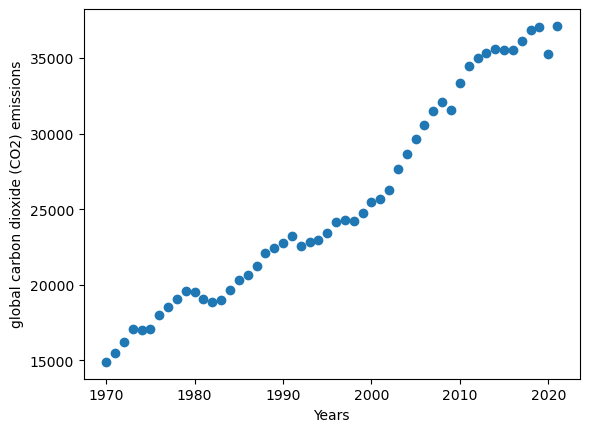

In [10]:
# plot of annual total global emissions after 2000
plt.scatter(df_global_1970.Year	, df_global_1970.Total)
plt.xlabel('Years')
plt.ylabel('global carbon dioxide (CO2) emissions')
plt.show()

In [11]:
#supervised learning regression 
df_global_1970 = df_global_1970.drop('Country', axis=1)
df_global_1970 = df_global_1970.drop('ISO 3166-1 alpha-3', axis=1)
year_df = df_global_1970.Year
X = year_df.values.reshape(-1, 1)
X[:5]
X.shape

(52, 1)

In [12]:
y = df_global_1970.Total
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [13]:
y_pred = model.predict(X)
print(y_pred.shape)

(52,)


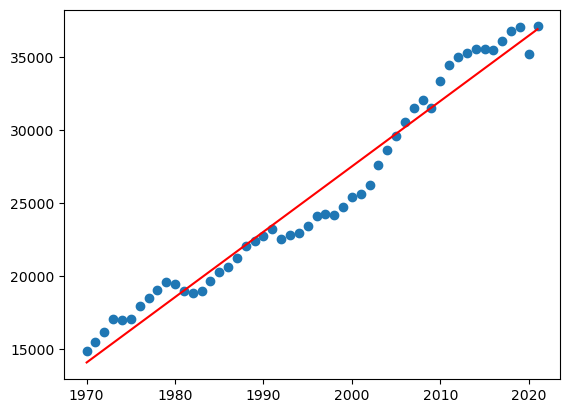

In [14]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [15]:
# predict future year ( use the dictionay to save the year and the key value pair)
future_years = [2030, 2040, 2050, 2100]
future_years_pred = dict()
for year in future_years:
    df = pd.DataFrame()
    df['Year'] = [year]
    df = df.values.reshape(-1, 1)
    pred = model.predict(df)
    # print(pred)
    future_years_pred[year] = pred

In [16]:
# summary of future year prediction
print("##### Predicted future results by our model #####\n")
for k,v in future_years_pred.items():
    print("Year %s, predicted emission:%.2f" % (k, v))
    
print("\nAccording to the Paris Accord, the target global emission level is 37000mt, which is an increase of only 11% of 2010 level.")
print("Our model predict that without course change, we will emit %.2fmt of co2 in the year of 2030, far exceeding the target." % (future_years_pred[2030]))

##### Predicted future results by our model #####

Year 2030, predicted emission:40969.19
Year 2040, predicted emission:45445.56
Year 2050, predicted emission:49921.94
Year 2100, predicted emission:72303.79

According to the Paris Accord, the target global emission level is 37000mt, which is an increase of only 11% of 2010 level.
Our model predict that without course change, we will emit 40969.19mt of co2 in the year of 2030, far exceeding the target.
